# 5 Numpy functions to work in the frequency domain with Python 

### Description of the document

> ### **Assignment 2 - Numpy Array Operations** 
>
> Leandro D. Medus

### Short intro

Numpy is a library extension for Python ....

**NumPy Reference**  
https://numpy.org/doc/stable/reference/index.html

**Routines**  
https://numpy.org/doc/stable/reference/routines.html

### Selected funtions for the current notebook

- numpy.sin https://numpy.org/doc/stable/reference/generated/numpy.sin.html#numpy.sin
- numpy.fft.fft https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft
- numpy.fft.ifft https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html#numpy.fft.ifft
- numpy.fft.fftfreq https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq
- numpy.fft.fftshift https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html#numpy.fft.fftshift

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
#jovian.commit(project='numpy-array-operations')
jovian.commit(user='leosf', filename='numpy-array-operations.ipynb', project='week3_as2_numpy-array-operations')

Let's begin by importing Numpy and listing out the functions covered in this notebook.

In [ ]:
import numpy as np

In [ ]:
# List of functions explained 
function1 = np.sin
function2 = np.fft.fft
function3 = np.fft.ifft
function4 = np.fft.fftfreq
function5 = np.fft.fftshift

## Function 1 - np.sin 

This function computes the trigonometric sine function in an element-wise fashion.
As an additional concept, matplot lib will be used as a plotting library.

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Example 1: single frequency component of a sine wave (working case)

# x-axis vector (2 periods of a sine wave)
x = np.arange(0, 4 * np.pi, 0.1)
# computing the sine wave
y = np.sin(x)

plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')

# plotting
plt.plot(x,y)
plt.show()

TODO: Explanation about example

In [ ]:
# Example 2: mutiple frequency component of a sine wave (working case)

# x-axis vector (time [seconds])
t = np.arange(0, 2, 0.01)

# frequencies
f1 = 2
f2 = 4

# amplitudes
A1 = 1
A2 = 3

# computing the sine wave
y1 = A1 * np.sin(2 * np.pi * f1 * t)
y2 = A2 * np.sin(2 * np.pi * f2 * t)

#plt.plot(x,y)
#plt.show()

In [ ]:
y1.shape

In [ ]:
# plotting
fig, axs = plt.subplots(2, 1)
axs[0].plot(t, y1, t, y2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('y1 and y2')
axs[0].grid(True)

axs[1].plot(t, y1+y2)
axs[1].set_xlim(0, 2)
axs[1].set_xlabel('time')
axs[1].set_ylabel('y1 + y2')
axs[1].grid(True)

fig.tight_layout()
plt.show()

TODO: Explanation about example

In [ ]:
# Example 3 - breaking (to illustrate when it breaks)
arr1 = ['a', 'b']

# computing the sine wave
y = np.sin(arr1)

The function expect floating-point values.

TODO: Some closing comments about when to use this function.

In [ ]:
jovian.commit(user='leosf', filename='numpy-array-operations.ipynb', project='week3_as2_numpy-array-operations')

## Function 2 - np.fft.fft

TODO: Add some explanations

In [ ]:
# Example 1 - working

# sampling frequency
fs = 1000 

tb = 0    # time begin [s]
te = 4    # time end [s]

f1 = 10   # frequency [hz]
f2 = 30   # frequency [hz]

A1 = 1  # amplitude [a.u.]
A2 = 4  # amplitude [a.u.]

ts = 1 / fs    # sampling interval 

# x-axis vector (time [seconds])
t = np.arange(tb, te, ts)

# sine waves data
y1 = A1 * np.sin(2 * np.pi * f1 * t)
y2 = A2 * np.sin(2 * np.pi * f2 * t)

y = y1 + y2

In [ ]:
# computing FFT
y_fft = np.fft.fft(y) / len(y)            # Normalize amplitude
y_fft_red = y_fft[range(int(len(y)/2))]   # Exclude sampling frequency

tpCount     = len(y)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount / fs
frequencies = values/timePeriod

In [ ]:
# plotting
fig, axs = plt.subplots(2, 1)

axs[0].set_title('Time representation of the signal')
axs[0].plot(t, y)
axs[0].set_xlim(tb, 1)
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('y(t)')
axs[0].grid(True)

axs[1].set_title('Frequency representation of the signal')
axs[1].set_xlim(0, 50)
axs[1].plot(frequencies, abs(y_fft_red))
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('Amplitude')
axs[1].grid(True)

fig.tight_layout()
plt.show()

TODO: Explanation about example

explicar la relación del Fs y el límite de la gráfica

In [ ]:
# Example 2 - working with axis

# sampling frequency
fs = 1000 

tb = 0    # time begin [s]
te = 4    # time end [s]

f1 = 20   # frequency [hz]
f2 = 25   # frequency [hz]

A1 = 10  # amplitude [a.u.]
A2 = 15  # amplitude [a.u.]

ts = 1 / fs    # sampling interval 

# x-axis vector (time [seconds])
t = np.arange(tb, te, ts)

# sine waves data
y1 = A1 * np.sin(2 * np.pi * f1 * t)
y2 = A2 * np.sin(2 * np.pi * f2 * t)

In [ ]:
# concatenation of the time values and the amplitudes values of the signal in one matrix
data = np.concatenate((t.reshape(te*fs, 1), y1.reshape(te*fs, 1), y2.reshape(te*fs, 1)) , axis=1)

print("data.shape: " + ''.join(str(data.shape)))

In [ ]:
# computing FFT over each signal (columns, avoiding timestamps)
y_fft = np.fft.fft(data[:,1:], axis=0) / len(data[:,0])             # Normalize amplitude
#y_fft = np.fft.fft(data[:,1], axis=-1) / len(data[:,0])            # Normalize amplitude
y_fft_red = y_fft[range(int(len(data[:,1:])/2))]                     # Exclude sampling frequency

tpCount     = len(data[:,0])
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount / fs
frequencies = values/timePeriod

In [ ]:
# plotting
fig, axs = plt.subplots(2, 1)

axs[0].set_title('Time representation of the signal')
axs[0].plot(data[:,0], data[:,1:])
axs[0].set_xlim(tb, 1)
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('y(t)')
axs[0].grid(True)

axs[1].set_title('Frequency representation of the signal')
axs[1].set_xlim(0, 50)
axs[1].plot(frequencies, abs(y_fft_red))
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('Amplitude')
axs[1].grid(True)

fig.tight_layout()
plt.show()

Explanation about example
  
| time 	|     A    	|    B    	|                  	|   	|
|:----:	|:--------:	|:-------:	|:----------------:	|---	|
|   0  	| 0.626386 	| 1.52325 	| --- axis=1 --- > 	|   	|
|      	|          	|    \|   	|                  	|   	|
|      	|          	|  axis=0 	|                  	|   	|
|      	|          	|    ↓    	|                  	|   	|

In [ ]:
# Example 3 - breaking (to illustrate when it breaks)
# computing FFT over each signal (columns, avoiding timestamps)
y_fft_error = np.fft.fft(data[:,1:], axis=5) / len(data[:,0])             # Normalize amplitude

The index parameter represents wich index of the data will be used to compute the FTT. In this scenario, the index is out of range because the data array is bidimensional, so correct values are: 0 for columns, 1 for rows, and -1 for the last index, which in this case is the same as 1. 

Closing comments: FTT function is used to compute the Fast Fourier Transformation of a signal or a group of signals.

In [ ]:
jovian.commit(user='leosf', filename='numpy-array-operations.ipynb', project='week3_as2_numpy-array-operations')

## Function 3 - np.fft.ifft

Inverse Fourier Transformation

In [ ]:
# Example 1 - working

# time vector
t = np.arange(0, 10, 0.01)

# Sine wave with multiple frequencies(1 Hz, 2 Hz and 4 Hz)
frec_vector = [1, 2, 4]
y = 0
for fi in frec_vector:
    y += np.sin(2 * np.pi * fi * t)

# Fourier transform on the signal
y_fft = np.fft.fft(y)

In [ ]:
# Inverse Fourier transform on the frequency domain to reconstruct the signal
y_ifft = np.fft.ifft(y_fft)

In [ ]:
# Plot the original sine wave using inverse Fourier transform
plt.plot(t, y_ifft)
plt.title("Sine wave from a frequency domain data")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim([0, 4])

plt.show()

In the example, a time-domain signal was reconstructed from frequency domain data. To depict the use case scenario, a sine wave was generated and an FTT was applied to get the frequency-domain data. from this point, IFFT library was used to get the result.

In [ ]:
# Example 2 - working with a matrix with multiple signals

# time vector
t = np.arange(0, 10, 0.01)

N = len(t)

# Sine wave with multiple frequencies(1 Hz, 2 Hz and 4 Hz)
frec_vector = [1, 2, 4]

data = t.reshape(N, 1)

for fi in frec_vector:
    A = fi / 2
    phi = A1 * 1
    y = A * np.sin(2 * np.pi * fi * t + phi)
    data = np.concatenate((data, y.reshape(N, 1)) , axis=1)

# Fourier transform on the signal
y_fft = np.fft.fft(data, axis=0)

In [ ]:
# Inverse Fourier transform on the frequency domain to reconstruct the signal
y_ifft = np.fft.ifft(y_fft, axis=0)

In [ ]:
# Plot the original sine wave using inverse Fourier transform

plt.plot(t, y_ifft[:,1], t, y_ifft[:,2], t, y_ifft[:,3])
plt.title("Sine wave from a frequency domain data")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim([0, 2])

plt.show()

The example shows how to reconstruct multiple signals with a IFFT

In [ ]:
# Example 3 - breaking (to illustrate when it breaks)

print("y_fft.shape: " + ''.join(str(y_fft.shape)))

y_ifft_err = np.fft.ifft(y_fft, axis=2)

The index parameter represents wich index of the data will be used to compute the FTT. In this scenario, the index is out of range because the data array is bidimensional, so correct values are: 0 to each column, 1 for each rows, and -1 for the last index, which in this case is the same as 1. 

Closing comments: IFTT function is used to compute the Fast Fourier Transformation of a signal or a group of signals.

In [ ]:
jovian.commit(user='leosf', filename='numpy-array-operations.ipynb', project='week3_as2_numpy-array-operations')

## Function 4 - np.fft.fftfreq

This function returns the Discrete Fourier Transform sample frequencies.

The returned float array f contains the frequency bin centers in cycles per unit of the sample spacing (with zero at the start). For instance, if the sample spacing is in seconds, then the frequency unit is cycles/second.

In [194]:
# Example 1 - working

Fs = 100
Ts = 1 / Fs

# time vector
t = np.arange(0, 10, Ts)

N = len(t)

# Sine wave with multiple frequencies(1 Hz, 2 Hz and 4 Hz)
frec_vector = [1, 2, 4]
As          = [5, 2, 6]
Phis        = [1.2, 0.9, 2.2]

data = t.reshape(N, 1)

for fi, A, Phi in zip(frec_vector, As, Phis):

    y = A * np.sin(2 * np.pi * fi * t + phi)
    data = np.concatenate((data, y.reshape(N, 1)) , axis=1)

# Fourier transform on the signal
y_fft = np.fft.fft(data[:,1:], axis=0)

In [195]:
data.shape

(1000, 4)

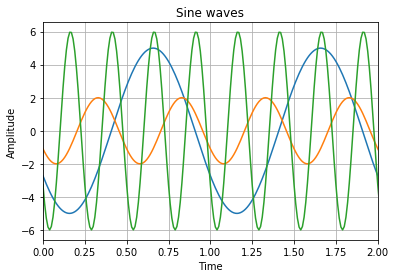

In [196]:
plt.plot(t, data[:,1], t, data[:,2], t, data[:,3])
plt.title("Sine waves")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim([0, 2])

plt.show()

In [ ]:
# now we try to figure out which frequency component has the greatest amplitude


In [208]:
# computing FFT
y_fft = np.fft.fft(data[:,1:], axis=0) / len(y)            # Normalize amplitude
y_fft.shape


(1000, 3)

In [204]:
# computing the frequency vector
fft_fre = np.fft.fftfreq(n=len(data[:,0]), d=1/Fs)


In [236]:
# finding the max value in the spectrum of each signal
maxs = (np.abs(y_fft)).max(axis=0)

#maxs = np.maximum(np.abs(y_fft),)

# Get the indices of maximum elements for each signal
max_indexs = np.abs(y_fft).argmax(axis=0)

# print the frequency component of each signal with the maximun amplitude
print(fft_fre[max_indexs])



[1. 2. 4.]


In [ ]:
y_fft_red = y_fft[range(int(len(y)/2))]   # Exclude sampling frequency

tpCount     = len(y)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount / fs
frequencies = values/timePeriod

TODO: Explanation about example

In [239]:
# Example 2 - working

y = np.array([2, 4, 5, -1, -5, 8, 9, 15, -4, -5], dtype=float)
y_ftt = np.fft.fft(y)
n = y.size
timestep = 0.1
freq = np.fft.fftfreq(n, d=timestep)
freq

array([ 0.,  1.,  2.,  3.,  4., -5., -4., -3., -2., -1.])

TODO Explanation about example

It's important to notice that because of the presence of the imaginary component, the resulting vector has negative frequencies

In [243]:
# Example 3 - breaking (to illustrate when it breaks)

y = np.array([2, 4, 5, -1, -5, 8, 9, 15, -4, -5], dtype=float)
y_ftt = np.fft.fft(y)
n = y.size
timestep = 'a'
freq = np.fft.fftfreq(n, d=timestep)
freq

TypeError: unsupported operand type(s) for /: 'float' and 'str'

The function only acept a scalar as a 'd' input parameter.

Some closing comments about when to use this function.

In [244]:
jovian.commit(user='leosf', filename='numpy-array-operations.ipynb', project='week3_as2_numpy-array-operations')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "leosf/week3-as2-numpy-array-operations" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/leosf/week3-as2-numpy-array-operations


'https://jovian.ml/leosf/week3-as2-numpy-array-operations'

## Function 5 - numpy.fft.fftshift

Shift the zero-frequency component to the center of the spectrum.

This function swaps half-spaces for all axes listed (defaults to all). Note that y[0] is the Nyquist component only if len(x) is even.

In [260]:
# Example 1 - working
Fs = 10
Ts = 1 / Fs

N_samples = 10

freq_vector = np.fft.fftfreq(N_samples, Ts)
print (freq_vector)

freq_vector_centered = np.fft.fftshift(freq_vector)
print(freq_vector_centered)


[ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]


Explanation about example

In [268]:
# Example 2 - working
Fs = 10
Ts = 1 / Fs

N_samples = 10

freqs_data = np.zeros((3,10))

freqs_data[0,:] = np.fft.fftfreq(N_samples, Ts)
freqs_data[1,:] = np.fft.fftfreq(N_samples, Ts)
freqs_data[2,:] = np.fft.fftfreq(N_samples, Ts)
print (freqs_data)

print("---")
freq_vector_centered = np.fft.fftshift(freqs_data, axes=1)
print(freq_vector_centered)

[[ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]
 [ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]
 [ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]]
---
[[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]]


TODO: Explanation about example

In [271]:
# Example 3 - breaking (to illustrate when it breaks)


freq_vector = np.fft.fftfreq(10, 0.1).reshape(2,5)
print (freq_vector)

print()
freq_vector_centered = np.fft.fftshift(freq_vector, frec_vector)
print(freq_vector_centered)

[[ 0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.]]



IndexError: tuple index out of range

The function only admit one input array-like as the argument

In [273]:
jovian.commit(user='leosf', filename='numpy-array-operations.ipynb', project='week3_as2_numpy-array-operations')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "leosf/week3-as2-numpy-array-operations" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/leosf/week3-as2-numpy-array-operations


'https://jovian.ml/leosf/week3-as2-numpy-array-operations'

## Conclusion

TODO: Summarize what was covered in this notebook, and where to go next

## Other functions to check:

NumPy internals  
https://numpy.org/doc/stable/reference/internals.html

Mathematical functions  
https://numpy.org/doc/stable/reference/routines.math.html#floating-point-routines

Optionally Scipy-accelerated routines (numpy.dual)  
https://numpy.org/doc/stable/reference/routines.dual.html

Discrete Fourier Transform (numpy.fft)  
https://numpy.org/doc/stable/reference/routines.fft.html

NumPy C-API  
https://numpy.org/doc/stable/reference/c-api/index.html

Using NumPy C-API  
https://numpy.org/doc/stable/user/c-info.html

Statistics  
https://numpy.org/doc/stable/reference/routines.statistics.html

Floating point routines  
https://numpy.org/doc/stable/reference/routines.math.html#floating-point-routines

